In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from preprocessingFunction import impute_nan

In [275]:
train_df=pd.read_excel('Data_Train.xlsx')

In [276]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [277]:
train_df.shape

(10683, 11)

In [278]:
train_df.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [279]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [280]:
train_df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [281]:
#duplicate entries checking
train_df.duplicated().sum()

220

In [282]:
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [283]:
train_df['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [284]:
train_df['Date_of_Journey'].nunique()

44

In [285]:
train_df['Date_of_Journey'].str.split("/") #to change the object type to string

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10683, dtype: object

In [286]:
train_df['Date']=train_df['Date_of_Journey'].str.split("/").str[0]  # to access the first one fron date we use str[1]

In [287]:
train_df['Month']=train_df['Date_of_Journey'].str.split("/").str[1]
train_df['Year']=train_df['Date_of_Journey'].str.split("/").str[2]

In [288]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [289]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Date             10683 non-null  object
 12  Month            10683 non-null  object
 13  Year             10683 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


In [290]:
train_df['Date']=train_df['Date'].astype(int)
train_df['Month']=train_df['Month'].astype(int)
train_df['Year']=train_df['Year'].astype(int)

In [291]:
train_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [292]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [293]:
train_df['Dep_Time_hour']=train_df['Dep_Time'].str.split(":").str[0]
train_df['Dep_Time_minute']=train_df['Dep_Time'].str.split(":").str[1]


In [294]:
train_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [295]:
train_df['Duration_hour']=train_df['Duration'].str.split(" ").str[0]


In [296]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Date             10683 non-null  int32 
 11  Month            10683 non-null  int32 
 12  Year             10683 non-null  int32 
 13  Dep_Time_hour    10683 non-null  object
 14  Dep_Time_minute  10683 non-null  object
 15  Duration_hour    10683 non-null  object
dtypes: int32(3), int64(1), object(12)
memory usage: 1.2+ MB


In [297]:
train_df['Dep_Time_hour']=train_df['Dep_Time_hour'].astype(int)
train_df['Dep_Time_minute']=train_df['Dep_Time_minute'].astype(int)


In [298]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)


In [299]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,2h
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,7h
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,19h
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,5h
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,4h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,2019,19,55,2h
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,2019,20,45,2h
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,2019,8,20,3h
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,1,3,2019,11,30,2h


In [300]:
train_df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Time_hour      0
Dep_Time_minute    0
Duration_hour      0
dtype: int64

In [301]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Arrival_Time     10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Date             10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Dep_Time_hour    10683 non-null  int32 
 13  Dep_Time_minute  10683 non-null  int32 
 14  Duration_hour    10683 non-null  object
dtypes: int32(5), int64(1), object(9)
memory usage: 1.0+ MB


In [302]:
train_df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,2h
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,7h
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,19h
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,5h
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,4h


In [303]:
#train_df['Arrival_Time']=train_df['Arrival_Time'].str.split(" ").str[0]
#or
train_df.Arrival_Time=train_df.Arrival_Time.apply(lambda x : x.split(" ")[0])

In [304]:
train_df['Arrival_Time_hour']=train_df['Arrival_Time'].str.split(":").str[0]
train_df['Arrival_Time_minute']=train_df['Arrival_Time'].str.split(":").str[1]

In [305]:
train_df['Arrival_Time_hour']=train_df['Arrival_Time_hour'].astype(int)
train_df['Arrival_Time_minute']=train_df['Arrival_Time_minute'].astype(int)


In [306]:
train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [307]:
train_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,2h,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,7h,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,19h,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,5h,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,4h,21,35


In [308]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10683 non-null  object
 1   Source               10683 non-null  object
 2   Destination          10683 non-null  object
 3   Route                10682 non-null  object
 4   Duration             10683 non-null  object
 5   Total_Stops          10682 non-null  object
 6   Additional_Info      10683 non-null  object
 7   Price                10683 non-null  int64 
 8   Date                 10683 non-null  int32 
 9   Month                10683 non-null  int32 
 10  Year                 10683 non-null  int32 
 11  Dep_Time_hour        10683 non-null  int32 
 12  Dep_Time_minute      10683 non-null  int32 
 13  Duration_hour        10683 non-null  object
 14  Arrival_Time_hour    10683 non-null  int32 
 15  Arrival_Time_minute  10683 non-null  int32 
dtypes: i

In [309]:
train_df['Duration_hour']=train_df.Duration.apply(lambda x: x.split("h")[0])

In [310]:
#in one of the  duration column the value is 5minute to check in which row it is present we have to follow below method
train_df[train_df['Duration_hour']=='5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2 stops,No info,17327,6,3,2019,16,50,5m,16,55


In [311]:
#row wise drop
train_df.drop(6474,axis=0,inplace=True)

In [312]:
train_df[train_df['Duration_hour']=='5m']   #dropped succesfully

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute


In [313]:
train_df['Duration_hour']=train_df['Duration_hour'].astype(int)

In [314]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10681 non-null  object
 4   Duration             10682 non-null  object
 5   Total_Stops          10681 non-null  object
 6   Additional_Info      10682 non-null  object
 7   Price                10682 non-null  int64 
 8   Date                 10682 non-null  int32 
 9   Month                10682 non-null  int32 
 10  Year                 10682 non-null  int32 
 11  Dep_Time_hour        10682 non-null  int32 
 12  Dep_Time_minute      10682 non-null  int32 
 13  Duration_hour        10682 non-null  int32 
 14  Arrival_Time_hour    10682 non-null  int32 
 15  Arrival_Time_minute  10682 non-null  int32 
dtypes: i

In [315]:
train_df.drop(['Duration'],axis=1,inplace=True)

In [316]:
train_df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,13,15


In [317]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10681 non-null  object
 4   Total_Stops          10681 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Date                 10682 non-null  int32 
 8   Month                10682 non-null  int32 
 9   Year                 10682 non-null  int32 
 10  Dep_Time_hour        10682 non-null  int32 
 11  Dep_Time_minute      10682 non-null  int32 
 12  Duration_hour        10682 non-null  int32 
 13  Arrival_Time_hour    10682 non-null  int32 
 14  Arrival_Time_minute  10682 non-null  int32 
dtypes: int32(8), int64(1), object(6)
memory usage: 1001.4

In [318]:
impute_nan(train_df,fill_value=0,fill_types=['mode_fill'],columns=['Total_Stops'],dataframe_name='Train')

missing value before removal in Train data


Airline                0
Source                 0
Destination            0
Route                  1
Total_Stops            1
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
Dep_Time_hour          0
Dep_Time_minute        0
Duration_hour          0
Arrival_Time_hour      0
Arrival_Time_minute    0
dtype: int64

missing value after removal in Train data


Airline                0
Source                 0
Destination            0
Route                  1
Total_Stops            0
Additional_Info        0
Price                  0
Date                   0
Month                  0
Year                   0
Dep_Time_hour          0
Dep_Time_minute        0
Duration_hour          0
Arrival_Time_hour      0
Arrival_Time_minute    0
dtype: int64

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,2,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,7,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,19,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,4,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,9,4,2019,19,55,2,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,2019,20,45,2,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,2019,8,20,3,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop,No info,12648,1,3,2019,11,30,2,14,10


In [319]:
train_df.drop(["Route"],axis=1,inplace=True)

In [320]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,22,20,2,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,5,50,7,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,9,25,19,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,18,5,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,16,50,4,21,35


In [321]:
train_df['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [322]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_airline=LabelEncoder()
LabelEncoder_Source=LabelEncoder()
LabelEncoder_Destination=LabelEncoder()
LabelEncoder_Total_Stops=LabelEncoder()
LabelEncoder_Additional_Info=LabelEncoder()

In [323]:
train_df['Airline']=LabelEncoder_airline.fit_transform(train_df['Airline'])


In [324]:
train_df['Source']=LabelEncoder_Source.fit_transform(train_df['Source'])
train_df['Destination']=LabelEncoder_Destination.fit_transform(train_df['Destination'])
train_df['Total_Stops']=LabelEncoder_Total_Stops.fit_transform(train_df['Total_Stops'])
train_df['Additional_Info']=LabelEncoder_Additional_Info.fit_transform(train_df['Additional_Info'])

In [325]:
LabelEncoder_airline.transform(["IndiGo"])

array([3])

In [326]:
train_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
0,3,0,5,4,8,3897,24,3,2019,22,20,2,1,10
1,1,3,0,1,8,7662,1,5,2019,5,50,7,13,15
2,4,2,1,1,8,13882,9,6,2019,9,25,19,4,25
3,3,3,0,0,8,6218,12,5,2019,18,5,5,23,30
4,3,0,5,0,8,13302,1,3,2019,16,50,4,21,35


In [327]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              10682 non-null  int32
 1   Source               10682 non-null  int32
 2   Destination          10682 non-null  int32
 3   Total_Stops          10682 non-null  int32
 4   Additional_Info      10682 non-null  int32
 5   Price                10682 non-null  int64
 6   Date                 10682 non-null  int32
 7   Month                10682 non-null  int32
 8   Year                 10682 non-null  int32
 9   Dep_Time_hour        10682 non-null  int32
 10  Dep_Time_minute      10682 non-null  int32
 11  Duration_hour        10682 non-null  int32
 12  Arrival_Time_hour    10682 non-null  int32
 13  Arrival_Time_minute  10682 non-null  int32
dtypes: int32(13), int64(1)
memory usage: 709.4 KB


In [328]:
#Outlier treatment 
train_df['Price'].mean()

9086.292735442801

In [329]:
train_df['Price'].std()

4610.8856953285895

In [330]:
#APPROACH 1
    # dropping the outliers with standard deviation
    #mean+3*std------>Upper limit
    #mean-3*std------>lower limit

In [331]:
upper_limit=train_df['Price'].mean()+3*train_df['Price'].std()
lower_limit=train_df['Price'].mean()-3*train_df['Price'].std()

In [332]:
upper_limit

22918.94982142857

In [333]:
lower_limit

-4746.364350542966

In [334]:
train_df[train_df['Price']>upper_limit]

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
123,1,2,1,0,8,27430,1,3,2019,23,0,20,19,15
396,6,2,1,0,8,36983,1,3,2019,12,50,6,19,15
486,4,0,5,0,8,26890,1,3,2019,8,55,6,15,15
510,4,0,5,0,8,26890,1,3,2019,7,0,5,12,25
597,1,4,3,1,8,25139,6,3,2019,9,40,29,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,24210,6,3,2019,19,50,21,16,50
10364,5,0,5,0,3,57209,1,3,2019,9,45,4,14,25
10383,4,0,5,0,8,26890,1,3,2019,7,0,22,5,5
10439,4,0,5,0,8,31825,1,3,2019,18,40,14,9,0


C:\Users\ROHEN\AI\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

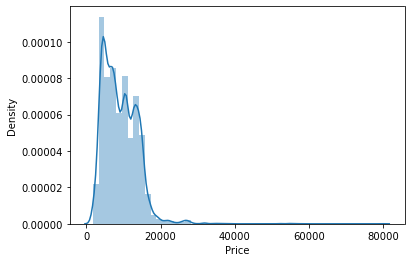

In [335]:
#plot a graph
sns.distplot(train_df['Price'],bins=50)

C:\Users\ROHEN\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

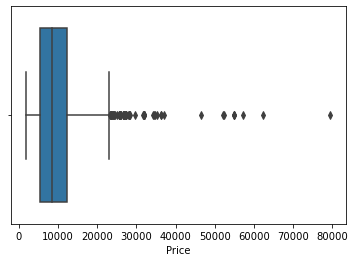

In [336]:
sns.boxplot('Price',data=train_df)

In [337]:
#APPROACH 2
    #dropping the outlier with percentile


In [338]:
train_df['Price'].quantile()

8372.0

In [339]:
upperlimit=train_df['Price'].quantile(0.95)
lowerlimit=train_df['Price'].quantile(0.05)

In [340]:
upperlimit

15764.0

In [341]:
lowerlimit

3543.0

In [342]:
train_df[train_df['Price']>upperlimit]   #here 526 rows comes outside the upper limit but in  std only 96 rows only comes outside the upper limit so STD method is better here

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
7,4,0,5,0,8,22270,1,3,2019,8,0,21,5,5
20,2,2,1,0,8,19495,6,3,2019,14,10,5,19,20
38,4,0,5,0,8,19225,6,3,2019,7,0,6,13,15
56,1,0,5,1,8,17345,1,3,2019,8,50,15,23,55
91,6,2,1,0,8,17057,6,3,2019,2,15,11,13,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10580,4,0,5,0,8,17261,6,3,2019,14,5,19,9,30
10625,4,2,1,1,5,19644,9,5,2019,11,40,7,19,0
10645,6,2,1,0,8,17057,3,3,2019,7,5,8,15,30
10668,4,2,1,1,8,21219,9,5,2019,11,40,7,19,0


In [343]:
#drop or cap
upper_limit=train_df['Price'].mean()+3*train_df['Price'].std()
lower_limit=train_df['Price'].mean()-3*train_df['Price'].std()


In [344]:
upper_limit

22918.94982142857

In [345]:
train_df.loc[train_df['Price']>upper_limit] # To find specif columns with values greater than upper limit


,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
123,1,2,1,0,8,27430,1,3,2019,23,0,20,19,15
396,6,2,1,0,8,36983,1,3,2019,12,50,6,19,15
486,4,0,5,0,8,26890,1,3,2019,8,55,6,15,15
510,4,0,5,0,8,26890,1,3,2019,7,0,5,12,25
597,1,4,3,1,8,25139,6,3,2019,9,40,29,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,24210,6,3,2019,19,50,21,16,50
10364,5,0,5,0,3,57209,1,3,2019,9,45,4,14,25
10383,4,0,5,0,8,26890,1,3,2019,7,0,22,5,5
10439,4,0,5,0,8,31825,1,3,2019,18,40,14,9,0


In [346]:
train_df.loc[train_df['Price']>upper_limit,'Price']=upper_limit  #Here we are changing the price of all the rows with upperlimit value.By doing this we remove all the outlier

In [347]:
train_df.loc[train_df['Price']==upper_limit] # To find specif columns with values greater than upper limit



,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
123,1,2,1,0,8,22918.949821,1,3,2019,23,0,20,19,15
396,6,2,1,0,8,22918.949821,1,3,2019,12,50,6,19,15
486,4,0,5,0,8,22918.949821,1,3,2019,8,55,6,15,15
510,4,0,5,0,8,22918.949821,1,3,2019,7,0,5,12,25
597,1,4,3,1,8,22918.949821,6,3,2019,9,40,29,15,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,4,4,3,1,8,22918.949821,6,3,2019,19,50,21,16,50
10364,5,0,5,0,3,22918.949821,1,3,2019,9,45,4,14,25
10383,4,0,5,0,8,22918.949821,1,3,2019,7,0,22,5,5
10439,4,0,5,0,8,22918.949821,1,3,2019,18,40,14,9,0


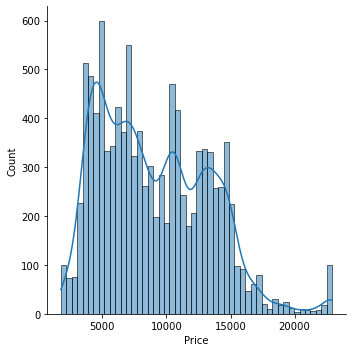

In [348]:
sns.displot(train_df['Price'],bins=50,kde=True)

C:\Users\ROHEN\AI\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

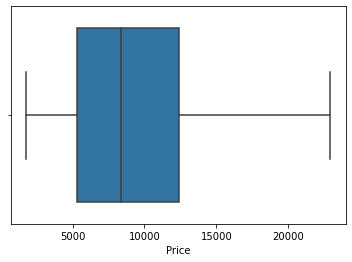

In [349]:
sns.boxplot('Price',data=train_df)

In [350]:
#Scaling down the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [351]:
scale_train_df=sc.fit_transform(train_df)

In [352]:
scale_train_df

array([[-0.41080484, -1.65843519,  2.41677843, ..., -0.97083112,
        -1.80031946, -0.88998423],
       [-1.26115217,  0.89029942, -0.97373235, ..., -0.38223823,
        -0.05081299, -0.58701691],
       [ 0.01436882,  0.04072122, -0.29563019, ...,  1.03038468,
        -1.36294284,  0.01891773],
       ...,
       [ 0.01436882, -1.65843519,  0.38247196, ..., -0.85311254,
        -0.3423974 , -0.28404959],
       [ 2.56541078, -1.65843519,  2.41677843, ..., -0.97083112,
         0.09497921, -0.88998423],
       [-1.26115217,  0.04072122, -0.29563019, ..., -0.26451966,
         0.82394024, -0.58701691]])

In [353]:
pd.DataFrame(scale_train_df)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.203553,1.237288,-1.467707,0.0,1.654268,-0.234932,-0.970831,-1.800319,-0.889984
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319079,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.382238,-0.050813,-0.587017
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.142123,-0.531796,1.109082,0.0,-0.607172,0.031502,1.030385,-1.362943,0.018918
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.658304,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.617675,1.407109,0.321885
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.005869,-1.475307,-1.467707,0.0,0.610527,1.363674,-0.735394,1.115525,0.624852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,1.407223,0.499921,-1.154220,-0.531796,-0.608777,0.0,1.132397,1.630108,-0.970831,1.261317,0.018918
10678,-1.261152,0.890299,-0.973732,1.407223,0.499921,-1.145293,1.591104,-0.608777,0.0,1.306354,1.097240,-0.970831,1.407109,-0.284050
10679,0.014369,-1.658435,0.382472,1.407223,0.499921,-0.420800,1.591104,-0.608777,0.0,-0.781129,-0.234932,-0.853113,-0.342397,-0.284050
10680,2.565411,-1.658435,2.416778,1.407223,0.499921,0.852232,-1.475307,-1.467707,0.0,-0.259258,0.297937,-0.970831,0.094979,-0.889984


In [354]:
#To change the column name from 0,1,2..... to names 
pd.DataFrame(scale_train_df,columns=train_df.columns)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Time_hour,Dep_Time_minute,Duration_hour,Arrival_Time_hour,Arrival_Time_minute
0,-0.410805,-1.658435,2.416778,1.407223,0.499921,-1.203553,1.237288,-1.467707,0.0,1.654268,-0.234932,-0.970831,-1.800319,-0.889984
1,-1.261152,0.890299,-0.973732,-0.253644,0.499921,-0.319079,-1.475307,0.250153,0.0,-1.303000,1.363674,-0.382238,-0.050813,-0.587017
2,0.014369,0.040721,-0.295630,-0.253644,0.499921,1.142123,-0.531796,1.109082,0.0,-0.607172,0.031502,1.030385,-1.362943,0.018918
3,-0.410805,0.890299,-0.973732,-0.807267,0.499921,-0.658304,-0.177979,0.250153,0.0,0.958440,-1.034235,-0.617675,1.407109,0.321885
4,-0.410805,-1.658435,2.416778,-0.807267,0.499921,1.005869,-1.475307,-1.467707,0.0,0.610527,1.363674,-0.735394,1.115525,0.624852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,-1.686326,0.890299,-0.973732,1.407223,0.499921,-1.154220,-0.531796,-0.608777,0.0,1.132397,1.630108,-0.970831,1.261317,0.018918
10678,-1.261152,0.890299,-0.973732,1.407223,0.499921,-1.145293,1.591104,-0.608777,0.0,1.306354,1.097240,-0.970831,1.407109,-0.284050
10679,0.014369,-1.658435,0.382472,1.407223,0.499921,-0.420800,1.591104,-0.608777,0.0,-0.781129,-0.234932,-0.853113,-0.342397,-0.284050
10680,2.565411,-1.658435,2.416778,1.407223,0.499921,0.852232,-1.475307,-1.467707,0.0,-0.259258,0.297937,-0.970831,0.094979,-0.889984


In [ ]:
def encoding_method(data,column,type_of_encoding,approach):
    for column in columns:
        if type_of_encoding == "nominal encoding":
            if approach == "onehotencoding":
                from sklearn.preprocessing import OneHotEncoder
                OneHotEncoder_name=LabelEncoder()
                train_df[column]=OneHotEncoder_name.fit_transform(train_df['column'])
            if approach == "OneHot encoding many features":
                mant_feature=list(df.column.value_counts().sort_values(ascending=False).head(10).index)
                

                 

